In [ ]:
import os
import pandas as pd 
import numpy 
import matplotlib.pyplot as plt
import seaborn as sns
import pltfont
pltfont.auto()

✅ 현재 폰트 적용됨: Arial Unicode MS


In [10]:
data_path = "/Users/jun/GitStudy/commerceAB/data/thelook_ecommerce"
data_list = os.listdir(data_path)
data_list.sort()
data_list

['distribution_centers_gzip.parquet',
 'inventory_items_gzip.parquet',
 'order_items_gzip.parquet',
 'orders_gzip.parquet',
 'products_gzip.parquet',
 'users_gzip.parquet']

In [11]:
cols = [i.rstrip("_gzip.parquet") for i in data_list ]

cols

['distribution_centers',
 'inventory_items',
 'order_items',
 'orders',
 'products',
 'users']

In [12]:
order_items_file_path = data_path + "/order_items_gzip.parquet"
order_items_df = pd.read_parquet(order_items_file_path, engine='pyarrow')  # 또는 engine='fastparquet'

In [13]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180742 entries, 0 to 180741
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   id                 180742 non-null  Int64              
 1   order_id           180742 non-null  Int64              
 2   user_id            180742 non-null  Int64              
 3   product_id         180742 non-null  Int64              
 4   inventory_item_id  180742 non-null  Int64              
 5   status             180742 non-null  object             
 6   created_at         180742 non-null  datetime64[ns, UTC]
 7   shipped_at         117374 non-null  datetime64[ns, UTC]
 8   delivered_at       63309 non-null   datetime64[ns, UTC]
 9   returned_at        18216 non-null   datetime64[ns, UTC]
 10  sale_price         180742 non-null  float64            
dtypes: Int64(5), datetime64[ns, UTC](4), float64(1), object(1)
memory usage: 16.0+ MB


In [14]:
order_items_df.describe(include='all',datetime_is_numeric=True)

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
count,180742.0,180742.0,180742.0,180742.0,180742.0,180742,180742,117374,63309,18216,180742.000000
unique,<NA>,<NA>,<NA>,<NA>,<NA>,5,NaN,NaN,NaN,NaN,NaN
top,<NA>,<NA>,<NA>,<NA>,<NA>,Shipped,NaN,NaN,NaN,NaN,NaN
freq,<NA>,<NA>,<NA>,<NA>,<NA>,54065,NaN,NaN,NaN,NaN,NaN
mean,90371.5,62305.0363,49938.669855,15241.888725,243741.685402,NaN,2024-02-12 20:50:03.705213184+00:00,2024-02-14 21:39:40.530685440+00:00,2024-02-16 12:14:49.825514496+00:00,2024-02-12 20:56:21.712554240+00:00,59.608965
min,1.0,1.0,1.0,1.0,2.0,NaN,2019-01-13 15:19:13+00:00,2019-01-14 05:45:00+00:00,2019-01-15 16:18:00+00:00,2019-01-18 07:54:00+00:00,0.020000
25%,45186.25,31004.0,24871.0,7971.25,121986.0,NaN,2023-03-19 06:26:50.500000+00:00,2023-03-23 08:35:15+00:00,2023-03-27 14:48:00+00:00,2023-03-20 20:38:15+00:00,24.690001
50%,90371.5,62302.5,49889.5,15899.0,243677.0,NaN,2024-07-24 03:23:47.500000+00:00,2024-07-28 04:30:30+00:00,2024-07-28 19:02:00+00:00,2024-07-16 23:34:00+00:00,39.990002
75%,135556.75,93604.75,75046.0,22509.0,365545.5,NaN,2025-05-12 00:32:33+00:00,2025-05-13 15:00:00+00:00,2025-05-15 06:53:00+00:00,2025-05-10 19:53:45+00:00,69.949997
max,180742.0,124599.0,100000.0,29120.0,487586.0,NaN,2025-10-12 19:08:45.657725+00:00,2025-10-11 18:32:39.370171+00:00,2025-10-16 06:09:12.596329+00:00,2025-10-17 22:10:55.822944+00:00,999.000000


In [15]:
order_items_df.isnull().sum()

id                        0
order_id                  0
user_id                   0
product_id                0
inventory_item_id         0
status                    0
created_at                0
shipped_at            63368
delivered_at         117433
returned_at          162526
sale_price                0
dtype: int64

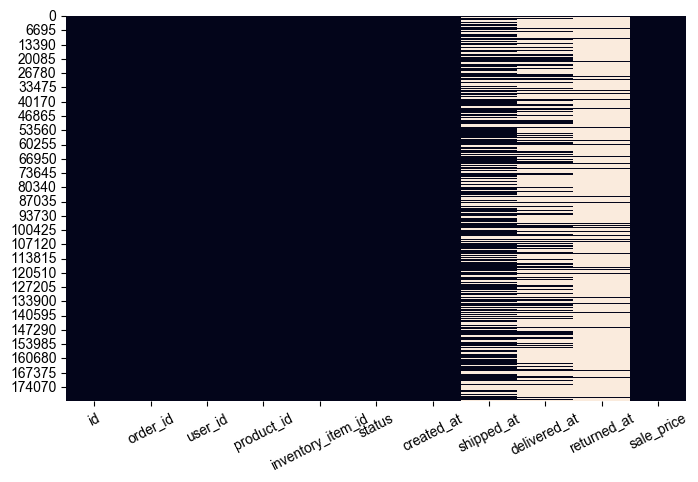

In [16]:
plt.figure(figsize=(8,5))  # 전체 그림 크기 지정
sns.heatmap(order_items_df.isnull(), cbar=False)
plt.xticks(rotation=27)  # x축 라벨 기울이기
plt.show()